### DFG implementation using text event log

Event log

In [ ]:
event_log = """A D B C E F
A C E C E F
A C E F
A C E F
A D B C E F
A B D F
A B D F
A B D C E C E F
A C E F
A D B D B C E F
A B D F
A D B F
A C E F
A D B F
A C E D B F
A D B D B C E F
A C E F
A D B C E D B F
A B D F
A D B C E F
A C E B D C E F
A C E F
A B D F
A D B C E F
A B D F
A C E F
A D B F
A C E F
A C E C E F
A B D F
A D B F
A D B D B F
A D B F
A D B F
A B D F
A B D F
A B D D B C E C E C E C E B D F
A C E B D F
A D B F
A D B F
A C E D B B D F
A B D B D F
A C E C E D B C E D B F
A D B F
A C E C E D B F
A B D F
A D B C E B D F
A C E F
A D B B D F
A C E F"""

Creating nested list of events for convinience

In [ ]:
event_log_list = event_log.split("\n")

for i in range(len(event_log_list)):
  trace_list = event_log_list[i].split(" ")
  event_log_list[i] = trace_list

event_log_list

[['A', 'D', 'B', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'D', 'B', 'C', 'E', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'B', 'D', 'C', 'E', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'D', 'B', 'D', 'B', 'C', 'E', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'D', 'B', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'D', 'B', 'F'],
 ['A', 'C', 'E', 'D', 'B', 'F'],
 ['A', 'D', 'B', 'D', 'B', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'D', 'B', 'C', 'E', 'D', 'B', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'D', 'B', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'B', 'D', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'D', 'B', 'C', 'E', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'D', 'B', 'F'],
 ['A', 'C', 'E', 'F'],
 ['A', 'C', 'E', 'C', 'E', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'D', 'B', 'F'],
 ['A', 'D', 'B', 'D', 'B', 'F'],
 ['A', 'D', 'B', 'F'],
 ['A', 'D', 'B', 'F'],
 ['A', 'B', 'D', 'F'],
 ['A', 'B', 'D'

Implementing DFG algorithm

Creating a dictionary to store trace and their frequencies

In [ ]:
from collections import defaultdict
dfg = defaultdict(int)
dfg

defaultdict(int, {})

Checking each trace in event log to count the subsequent pars of events

In [ ]:
for trace in event_log_list:
    for i in range(len(trace) - 1):  # -1 to avoid going out of bounds
        source = trace[i]
        target = trace[i + 1]
        dfg[(source, target)] += 1

In [ ]:
for (src, tgt), freq in dfg.items():
    print(f"{src} → {tgt}: {freq} times")

A → D: 19 times
D → B: 30 times
B → C: 10 times
C → E: 38 times
E → F: 20 times
A → C: 18 times
E → C: 8 times
A → B: 13 times
B → D: 23 times
D → F: 16 times
D → C: 2 times
B → F: 14 times
E → D: 6 times
E → B: 4 times
D → D: 1 times
B → B: 2 times


Visualization fo the graph

In [ ]:
!pip install networkx matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

Function for visualization of the graph

In [ ]:
def draw_dfg(dfg):
    G = nx.DiGraph()  # Directed graph

    # Add edges with weights
    for (src, tgt), weight in dfg.items():
        G.add_edge(src, tgt, label=str(weight))

    # Layout for nice positioning
    pos = nx.spring_layout(G, seed=42)  # layout algorithm for positioning

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, arrows=True)

    # Draw edge labels (frequencies)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)

    plt.title("Directly-Follows Graph (DFG)")
    plt.axis('off')
    plt.show()

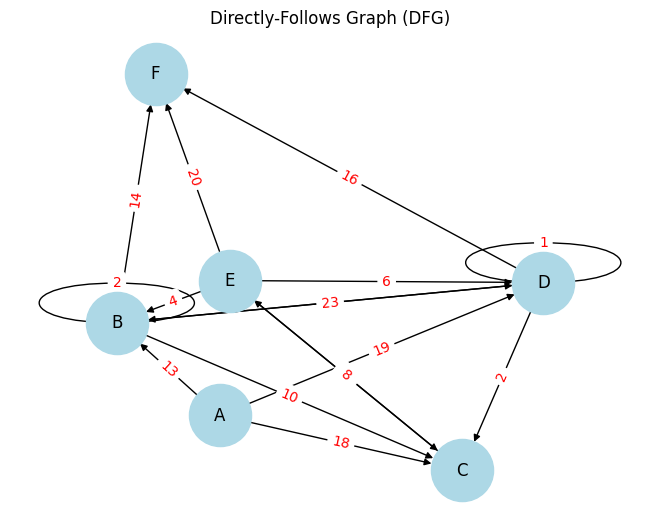

In [ ]:
draw_dfg(dfg)

### Implementation using XES file

In [ ]:
!pip install pm4py

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.6 MB/s eta 0:00:00
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26098 sha256=0e3ea529d3c0118da145e2898a90708b53283bc6cf00bd2c9da2fa0456c7f915
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built intervaltree


Install log

In [ ]:
import pm4py

from pm4py.objects.log.importer.xes import importer as xes_importer

log = xes_importer.apply("Helpdesk.xes")
log[0]

parsing log, completed traces ::   0%|          | 0/4580 [00:00<?, ?it/s]

{'attributes': {'concept:name': 'Case1', 'variant': 'Variant 12', 'variant-index': 12, 'creator': 'Fluxicon Disco'}, 'events': [{'concept:name': 'Assign seriousness', 'lifecycle:transition': 'complete', 'org:resource': 'Value 1', 'time:timestamp': datetime.datetime(2012, 10, 9, 14, 50, 17), 'Activity': 'Assign seriousness', 'Resource': 'Value 1'}, '..', {'concept:name': 'Closed', 'lifecycle:transition': 'complete', 'org:resource': 'Value 3', 'time:timestamp': datetime.datetime(2012, 11, 9, 12, 54, 39), 'Activity': 'Closed', 'Resource': 'Value 3'}]}

Discover DFG

In [ ]:
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
dfg = dfg_discovery.apply(log)

Visualizaiton of DFG

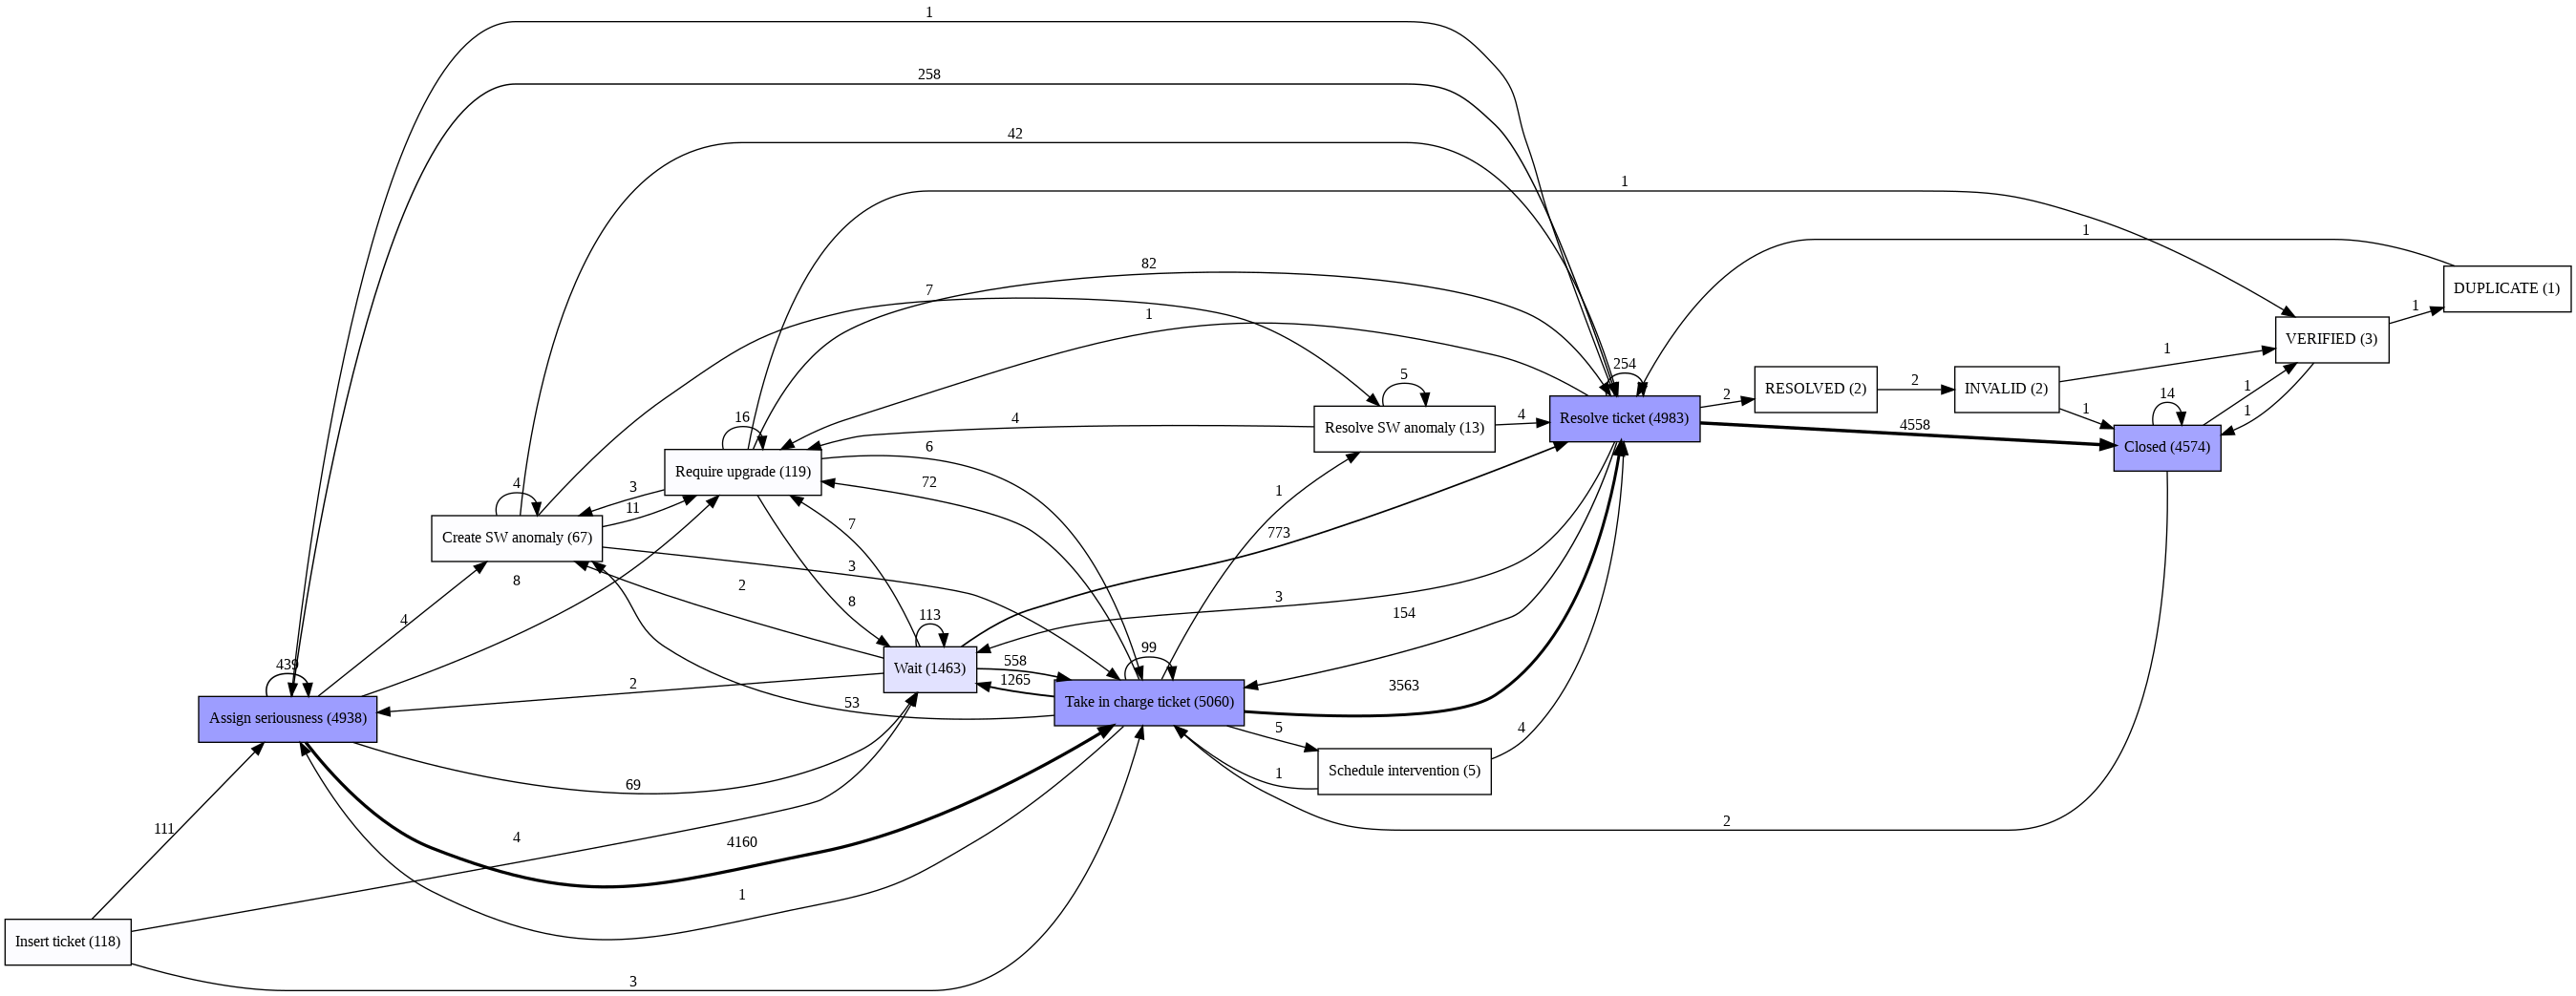

In [ ]:
from pm4py.visualization.dfg import visualizer as dfg_visualization

gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)